#                                 Twitter Sentimental Analysis

In this notebook ,i simply use Machine Learning Algorthims to find out sentiments of tweets
 #### Here is a some steps follows:
1. Import libraries 
2. checking the datasets
3. Plotting the sentiments on Piechart
4. Text Analysis
5.  ML model likes LogisticRegression Model ,RandomForestClassifier

The main objective is to present a simple **NLP** project and to practice the main uses of libraries such as **wordcloud**
  ,**sklearn**, **nltk** and **re**.

    

### 1 Import Library

In [1]:
import pandas as pd  # for dataframe
from wordcloud import WordCloud #Word visualization
import matplotlib.pyplot as plt #Plotting properties
import seaborn as sns #Plotting properties
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted
import re #Regular expressions
import nltk
from nltk import word_tokenize
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os

In [2]:
# my file location was in other directory so change 
os.chdir("D:\\Data Science\\Dataset" )
df = pd.read_csv('twitter.csv')

In [3]:
df.head(5)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
# adding columns to dataframe
df.columns=['id','information','type','text']
df.head(5)

,id,information,type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
df.isnull().sum()

id               0
information      0
type             0
text           686
dtype: int64

#### text col have 686 null values . so now 1st deal with null values

In [6]:
df['text'].value_counts()[:10]

                                                                                                                                                                                                                                                                      172
It is not the first time that the EU Commission has taken such a step.                                                                                                                                                                                                172
At the same time, despite the fact that there are currently some 100 million people living below the poverty line, most of them do not have access to health services and do not have access to health care, while most of them do not have access to health care.    172
<unk>                                                                                                                                                                                                     

### 2. Checking the dataset

In [7]:
info_1 =df['information'].value_counts().reset_index()
info_1

,index,information
0,TomClancysRainbowSix,2400
1,MaddenNFL,2400
2,Microsoft,2400
3,LeagueOfLegends,2394
4,CallOfDuty,2394
5,Verizon,2382
6,CallOfDutyBlackopsColdWar,2376
7,ApexLegends,2376
8,Facebook,2370
9,WorldOfCraft,2364


In [8]:
types =df['type'].value_counts().reset_index()
types
    

,index,type
0,Negative,22542
1,Positive,20831
2,Neutral,18318
3,Irrelevant,12990


In [9]:
type_per= round(df['type'].value_counts().head(4)/df.shape[0]*100,2).reset_index().rename(columns={'index':'Type','type':'Percent'})
type_per

,Type,Percent
0,Negative,30.18
1,Positive,27.89
2,Neutral,24.53
3,Irrelevant,17.39


### 3.Plotting the sentiments on Piechart

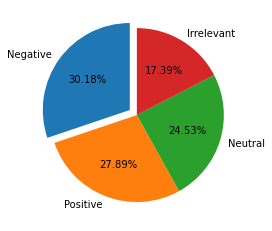

In [10]:
exp= [0.1,0,0,0]
plt.pie(type_per['Percent'], labels= type_per['Type'] ,explode= exp,autopct='%1.2f%%',startangle=90);

<AxesSubplot:xlabel='type', ylabel='count'>

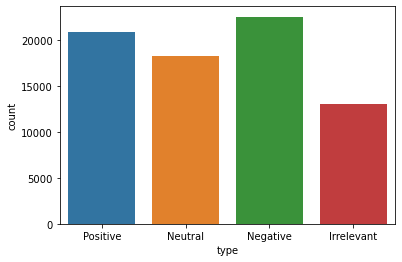

In [11]:
sns.countplot(x=df['type'])

In [12]:
top_10_info = df['information'].value_counts().head(15).reset_index().rename(columns={'index':'Entity','type':'value'})
top_10_info


,Entity,information
0,TomClancysRainbowSix,2400
1,MaddenNFL,2400
2,Microsoft,2400
3,LeagueOfLegends,2394
4,CallOfDuty,2394
5,Verizon,2382
6,CallOfDutyBlackopsColdWar,2376
7,ApexLegends,2376
8,Facebook,2370
9,WorldOfCraft,2364


In [13]:
ff =df.groupby(['information', 'type']).type.count().unstack()[:14]
ff

type,Irrelevant,Negative,Neutral,Positive
information,,,,
Amazon,192,576,1236,312
ApexLegends,192,600,942,642
AssassinsCreed,264,378,156,1446
Battlefield,918,474,360,594
Borderlands,240,426,600,1019
CS-GO,636,348,552,768
CallOfDuty,672,894,378,450
CallOfDutyBlackopsColdWar,576,576,360,864
Cyberpunk2077,480,390,468,966


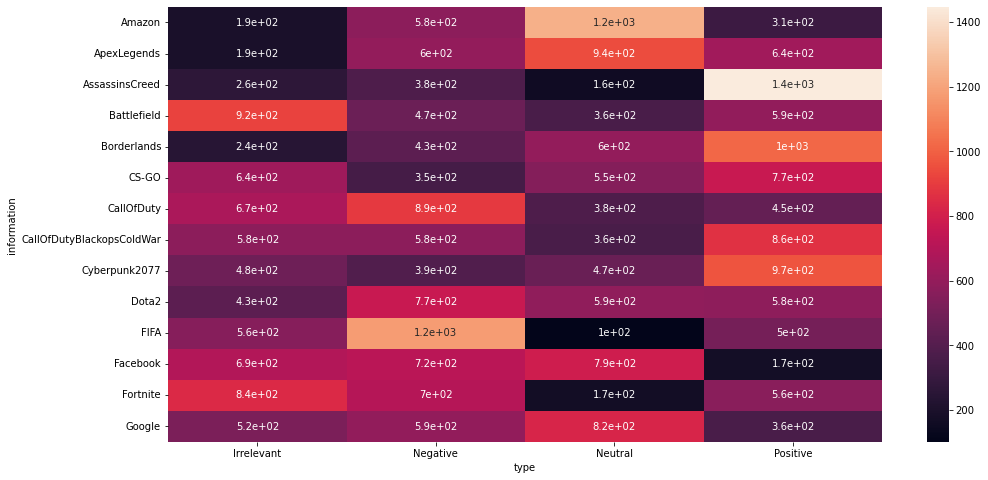

In [14]:
plt.figure(figsize=(16,8))
sns.heatmap(ff, annot = True)            
plt.yticks(rotation ='horizontal')
plt.show()


In [15]:
#Text transformation
df["lower"]=df.text.str.lower() #lowercase
df["lower"]=[str(data) for data in df.lower] #converting all to string
df["lower"]=df.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex




In [16]:
df.head()

,id,information,type,text,lower
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


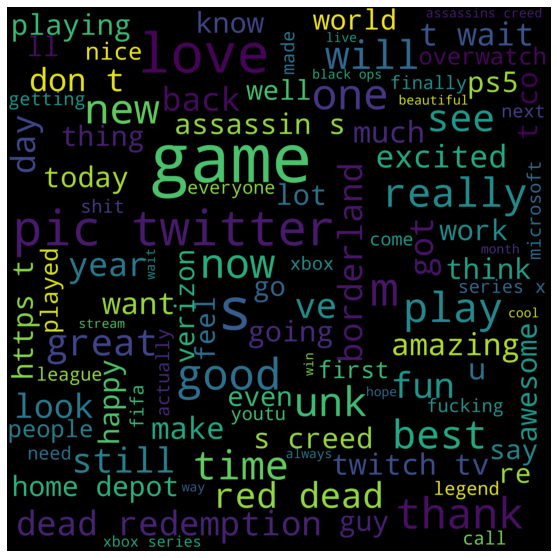

In [17]:
word_cloud_text = ''.join(df[df["type"]=="Positive"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
from PIL import Image
import urllib
import requests
import numpy as np
from wordcloud import ImageColorGenerator

In [19]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(word_cloud_text)

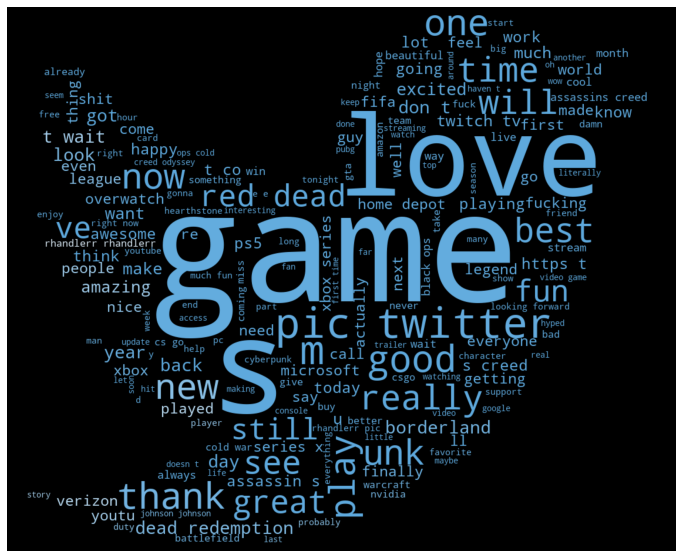

In [20]:
plt.figure(figsize = (16,10))
image_colors = ImageColorGenerator(Mask)
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")


plt.axis('off')
plt.show()

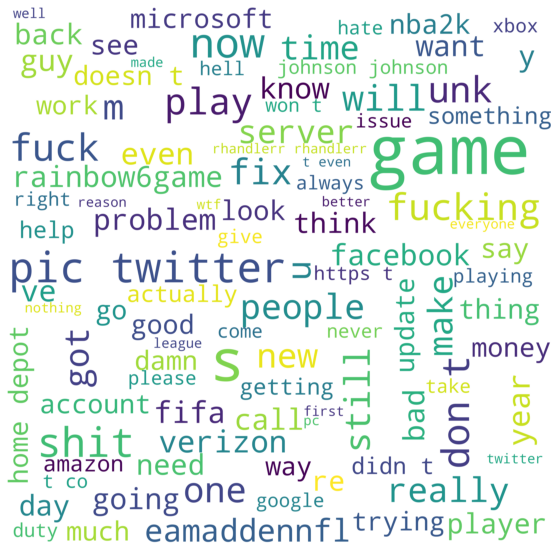

In [21]:
word_cloud_text = ''.join(df[df["type"]=="Negative"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

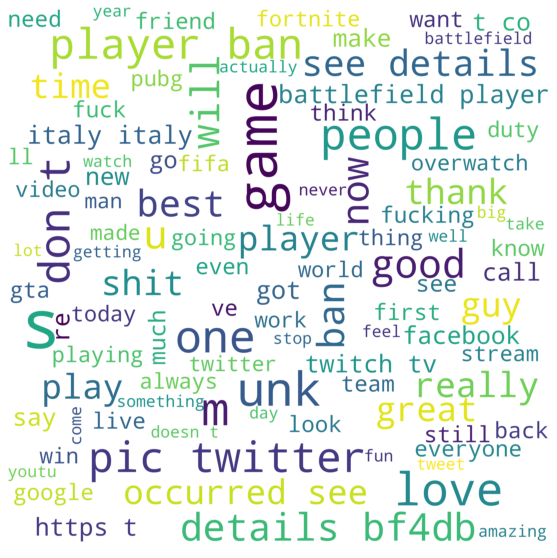

In [22]:
word_cloud_text = ''.join(df[df["type"]=="Irrelevant"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

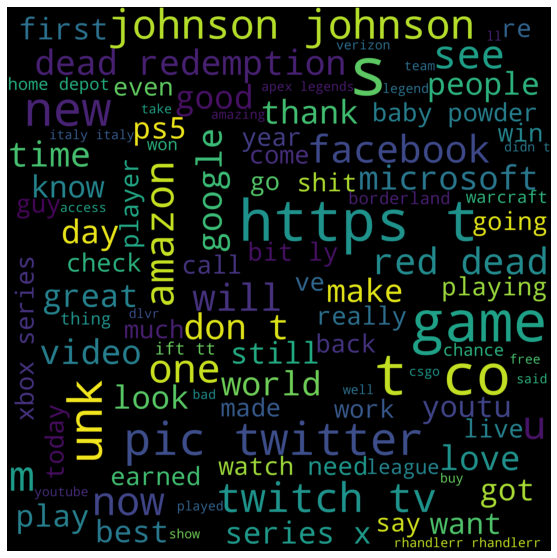

In [23]:
word_cloud_text = ''.join(df[df["type"]=="Neutral"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [24]:
plot1=df.groupby(["information","type"]).count().reset_index()
plot1.head()

,information,type,id,text,lower
0,Amazon,Irrelevant,192,186,192
1,Amazon,Negative,576,575,576
2,Amazon,Neutral,1236,1207,1236
3,Amazon,Positive,312,308,312
4,ApexLegends,Irrelevant,192,192,192


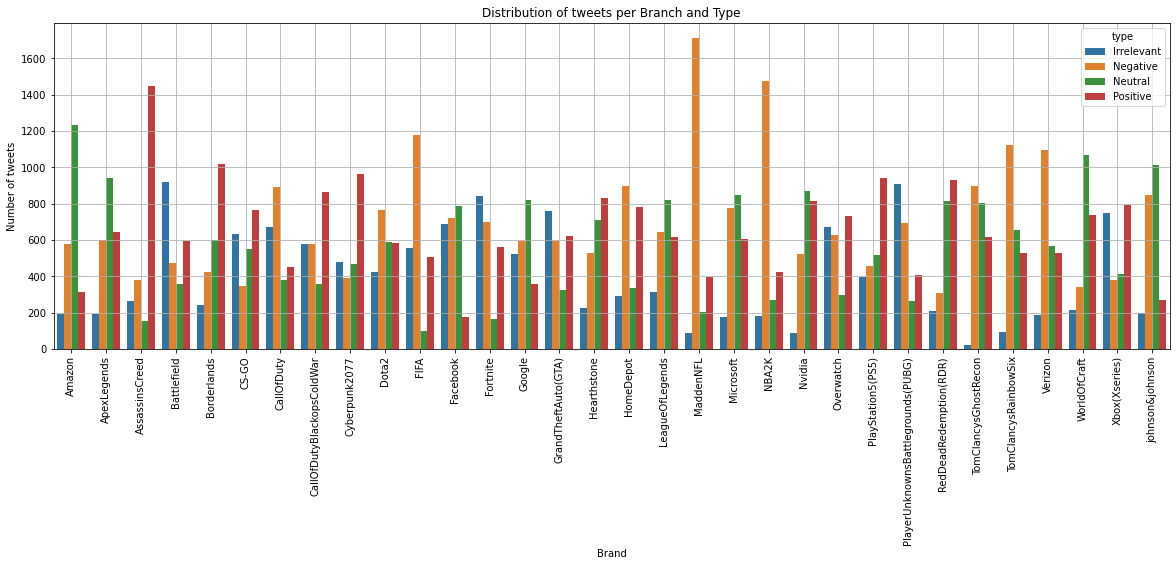

In [25]:
#Figure of comparison per branch
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="information",y="id",hue="type")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

### 3.Text analysis
With the clean text, the initial number of unique tokens was counted to identify the model complexity. As presented, there are more than 30 thousand unique words.

In [26]:
import nltk
nltk.download('punkt')
#Text splitting
tokens_text = [word_tokenize(str(word)) for word in df.lower]
#Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91808\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of tokens:  30436


In [27]:
print(tokens_text[1],tokens_text[43])


['im', 'getting', 'on', 'borderlands', 'and', 'i', 'will', 'kill', 'you', 'all'] ['watch', 'this', 'epic', 'striptease']


#### The tokens_text variable groups all the texts by the different words stored on a List.

In [28]:
#Choosing english stopwords
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [29]:
#Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

In [30]:
print(bow_counts)

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function word_tokenize at 0x000001C44DB40550>)


In [31]:
#Train - Test splitting
reviews_train, reviews_test = train_test_split(df, test_size=0.2, random_state=0)

In [32]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

C:\Users\91808\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [33]:
X_test_bow

<14937x29032 sparse matrix of type '<class 'numpy.int64'>'
	with 161164 stored elements in Compressed Sparse Row format>

In [34]:
#Labels for train and test encoding
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

In [35]:
#Total of registers per category
round(y_test_bow.value_counts() / y_test_bow.shape[0],2)

Negative      0.30
Positive      0.28
Neutral       0.24
Irrelevant    0.17
Name: type, dtype: float64

### 5 ML Model Logistic Regression & RandomForestClassifier
For the main **regression** model, it was used a simple **LogisticRegression**  & **RandomForestClassifier** of the sklearn library alongside the Bag of Words (BoW) approach. This last method helps to classify and group the relevant data to help the model identify the proper trends.

On this first BoW, the stopwords were considered alongside a default ngram of 1

In [36]:
# Logistic regression
 
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=200)
model1.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ",accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  83.34337551047733


In [37]:
model2 = LogisticRegression(C=0.9, solver="liblinear",max_iter=200)
# Logistic regression
model2.fit(X_train_bow, y_train_bow)
# Prediction
test_pred_2 = model2.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_2) * 100)

Accuracy:  83.12244761330923


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

text_classifier = RandomForestClassifier(n_estimators=50, random_state=0)
text_classifier.fit(X_train_bow, y_train_bow)

y_pred=text_classifier.predict(X_test_bow)
print(classification_report(y_test_bow,y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.96      0.85      0.90      2569
    Negative       0.93      0.92      0.93      4502
     Neutral       0.91      0.90      0.91      3658
    Positive       0.86      0.94      0.90      4208

    accuracy                           0.91     14937
   macro avg       0.92      0.90      0.91     14937
weighted avg       0.91      0.91      0.91     14937



##  Final remarks 

As presented in the notebook, a simple NLP approach helped to obtain a **91%** accuracy by using RandomForestClassifier
and **83%**  by using LogisticRegression .In this projects i learn how to deals with sentimental analysis by using differnts libraries.



